

# Определение выгодного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков делают, сколько сообщений каждый отправил и сколько интернет-трафика использовал за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Исходные данные**

Данные хранятся в следующих файлах:

1) /datasets/calls.csv

2) /datasets/internet.csv

3) /datasets/messages.csv

4) /datasets/tariffs.csv

5) /datasets/users.csv

Также имеется описание тарифных планов:

1. Тариф «Смарт»
    * Ежемесячная плата: 550 рублей
    * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
      - минута разговора: 3 рубля
      - сообщение: 3 рубля
      - 1 Гб интернет-трафика: 200 рублей

2. Тариф «Ультра»
    * Ежемесячная плата: 1950 рублей
    * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
      - минута разговора: 1 рубль
      - сообщение: 1 рубль
      - 1 Гб интернет-трафика: 150 рублей

**План работы:**

1. Изучим исходные данные
2. Выполним подготовку данных
   - приведем данные к нужным типам;
   - найдем и исправим ошибки в данных;
   - Посчитайте для каждого пользователя (количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя. 
3. Анализ данных:
   - определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
   - посчитаем среднее количество, дисперсию и стандартное отклонение;
   - построим гистограммы и опишим распределение.
4. Проверка гипотез:
   - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
   - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
5. Выводы

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
import matplotlib.pyplot as plt # импортируем модуль pyplot из matplotlib
from scipy import stats as st # импортируем библиотеку scipy

### Данные о звонках:

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # прочитаем файл csv и сохраним данные в таблицу calls.

In [3]:
# Для таблицы calls выведем на экрам первые 10 строк таблицы методом head(), информацию о таблице методом info(), 
# описание данных столбца'duration' методом describe() и кол-во дубликатов методом duplicated()

display("Таблица")
display(calls.head(10))
display("------------------------------------")
display("Информация о таблице")
display(calls.info())
display("------------------------------------")
display("Описание таблицы методом describe()")
display(calls.duration.describe())
display("------------------------------------")
display("Количество дубликатов")
display(calls.duplicated().sum())

'Таблица'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


'------------------------------------'

'Информация о таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

'------------------------------------'

'Описание таблицы методом describe()'

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

'------------------------------------'

'Количество дубликатов'

0

In [4]:
# получим данные о количестве уникальных значений в столбце 'duration' таблицы calls
calls.duration.value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

### Данные об использовании интернета:

In [5]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0) # прочитаем файл csv и сохраним данные в таблицу internet.

In [6]:
# Для таблицы internet выведем на экрам первые 10 строк таблицы методом head(), информацию о таблице методом info(), 
# описание данных столбца 'mb_used' методом describe() и кол-во дубликатов методом duplicated()

display("Таблица")
display(internet.head(10))
display("------------------------------------")
display("Информация о таблице")
display(internet.info())
display("------------------------------------")
display("Описание таблицы методом describe()")
display(internet.mb_used.describe())
display("------------------------------------")
display("Количество дубликатов")
display(internet.duplicated().sum())

'Таблица'

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


'------------------------------------'

'Информация о таблице'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

'------------------------------------'

'Описание таблицы методом describe()'

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

'------------------------------------'

'Количество дубликатов'

0

In [7]:
# получим данные о количестве уникальных значений в столбце 'mb_used' таблицы internet
internet.mb_used.value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

### Данные о сообщениях:

In [8]:
messages = pd.read_csv('/datasets/messages.csv') # прочитаем файл csv и сохраним данные в таблицу messages.

In [9]:
# Для таблицы messages выведем на экрам первые 10 строк таблицы методом head(), информацию о таблице методом info(), 
# и кол-во дубликатов методом duplicated()

display("Таблица")
display(messages.head(10))
display("------------------------------------")
display("Информация о таблице")
display(messages.info())
display("------------------------------------")
display("Количество дубликатов")
display(messages.duplicated().sum())

'Таблица'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


'------------------------------------'

'Информация о таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

'------------------------------------'

'Количество дубликатов'

0

### Данные о пользователях:

In [10]:
users = pd.read_csv('/datasets/users.csv') # прочитаем файл csv и сохраним данные в таблицу users.

In [11]:
display("Таблица")
display(users.head(10))
display("------------------------------------")
display("Информация о таблице")
display(users.info())
display("------------------------------------")
display("Количество дубликатов")
display(users.duplicated().sum())

'Таблица'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


'------------------------------------'

'Информация о таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

'------------------------------------'

'Количество дубликатов'

0

Также посмотрим какие уникальные значения содержатся в столбцах таблицы users 'age' и 'city'

In [12]:
users.age.unique()

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35])

In [13]:
users.city.unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

### Данные о тарифных планах:

In [14]:
tariffs = pd.read_csv('/datasets/tariffs.csv') # прочитаем файл csv и сохраним данные в таблицу tariffs.

In [15]:
tariffs.head() # выведем первые 10 строк таблицы на экран

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод:

1) Прочитали файлы с данными и сохранили их в таблицы.

2) Посмотрели основную информацию о данных в таблицах следующими методами: head(), info(), describe(), duplicated(), unique().

В данных о звонках имеются 39613 строк с нулевым значениями столбца 'duration'. Эти данные составляют 19,6% от всех данных по звонкам. Возможные причины большого количества нулевых звонков - абоненты не могли дозвониться до другого абонента и осуществляли повторные набор номера несколько раз (автодозвон).

В данных об интернет трафике также много строк с нулевыми значениями в столбце 'mb_used' - 19596 строк. Нулевые значения составляют 11,1% от всех данных таблицы internet. Возможные причины появления нулевых значений - при попытке абонента выйти в интернет, было плохая связь и интернет не загружался (нет сети).

Данные готовы к последующей подготовке.

## Шаг 2. Подготовьте данные

#### 2.1. Переименуем название стобца:

Переименуем столбец 'tariff_name' на 'tariff' чтобы было одиноково с таблицей users. Это необходимо для дальнейшего объединения таблиц

In [16]:
# переименнуем столбец 'tariff_name' на 'tariff' чтобы было одиноково с таблицей users 
# это необходимо для дальнейшего объединения таблиц

tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
                'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

#### 2.2. Округлим значения минут звонков и интернет трафика:

Известно, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута, тоже самое с мегабайтами.

In [17]:
# значения дтительности звонка 'duration' округлим до минут в большую сторону 
calls.duration = np.ceil(calls.duration)

In [18]:
# значения объема потраченного трафика 'mb_used' округлим до мегабайт  в большую сторону 
internet.mb_used =np.ceil(internet.mb_used)

#### 2.3. Добавим данные о номере месяца в таблицы:

In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # вызовем методом to_datetime(),
                                                                            # который переводит строки в даты

In [20]:
calls['month'] = calls['call_date'].dt.month # вызов метода dt.month для опр-ия месяца

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') # вызовем методом to_datetime(),
                                                                            # который переводит строки в даты

In [22]:
messages['month'] = messages['message_date'].dt.month # вызов метода dt.month для опр-ия месяца

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') # вызовем методом to_datetime(),
                                                                            # который переводит строки в даты

In [24]:
internet['month'] = internet['session_date'].dt.month # вызов метода dt.month для опр-ия месяца

#### 2.4. Группировка данных:

В данных о звонках имеются 39613 строк с нулевым значениями столбца 'duration'. Эти данные составляют 19,6% от всех данных по звонкам. Возможные причины большого количества нулевых звонков - абоненты не могли дозвониться до другого абонента и осуществляли повторные набор номера несколько раз (автодозвон).

В данных об интернет трафике также много строк с нулевыми значениями в столбце 'mb_used' - 19596 строк. Нулевые значения составляют 11,1% от всех данных таблицы internet. Возможные причины появления нулевых значений - при попытке абонента выйти в интернет, было плохая связь и интернет не загружался (нет сети).

Отфильтруем нулевые звонки и нулевой интернет трафик.

In [25]:
calls_filt = calls.query('duration > 0').reset_index()
calls_filt

,index,id,call_date,duration,user_id,month
0,2,1000_2,2018-06-11,3.0,1000,6
1,3,1000_3,2018-09-21,14.0,1000,9
2,4,1000_4,2018-12-15,6.0,1000,12
3,7,1000_7,2018-08-22,19.0,1000,8
4,8,1000_8,2018-09-15,19.0,1000,9
...,...,...,...,...,...,...
162989,202602,1499_215,2018-12-26,1.0,1499,12
162990,202603,1499_216,2018-10-18,19.0,1499,10
162991,202604,1499_217,2018-11-10,11.0,1499,11
162992,202605,1499_218,2018-10-06,5.0,1499,10


In [26]:
internet_filt = internet.query('mb_used > 0').reset_index()
internet_filt

,index,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...,...
129793,149390,1499_151,753.0,2018-10-11,1499,10
129794,149391,1499_152,319.0,2018-10-03,1499,10
129795,149392,1499_153,491.0,2018-12-14,1499,12
129796,149394,1499_155,1247.0,2018-11-26,1499,11


Сгруппируем данные в таблицах  по 'user_id' и 'month' и посчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам.

In [27]:
calls = calls_filt.groupby(['user_id', 'month']).agg({'duration' : ['sum', 'count']}).reset_index()
calls.columns = ['user_id', 'month', 'minutes_sum', 'calls_cnt']
calls

,user_id,month,minutes_sum,calls_cnt
0,1000,5,159.0,17
1,1000,6,172.0,28
2,1000,7,340.0,41
3,1000,8,408.0,42
4,1000,9,466.0,46
...,...,...,...,...
3163,1498,10,247.0,30
3164,1499,9,70.0,8
3165,1499,10,449.0,44
3166,1499,11,612.0,62


In [28]:
messages = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages.columns = ['user_id', 'month', 'messages_cnt']
messages

,user_id,month,messages_cnt
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [29]:
internet = internet_filt.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet.columns = ['user_id', 'month', 'mb_used_sum']
internet

,user_id,month,mb_used_sum
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3196,1498,10,20604.0
3197,1499,9,1848.0
3198,1499,10,17809.0
3199,1499,11,17984.0


In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 3 columns):
user_id        3201 non-null int64
month          3201 non-null int64
mb_used_sum    3201 non-null float64
dtypes: float64(1), int64(2)
memory usage: 75.1 KB


#### 2.5. Объединение таблиц:

Соединим данные в общую таблицу

In [31]:
# объеденим таблицу calls и internet методом merge (how='outer')

calls_internet = calls.merge(internet, on=(['user_id', 'month']), how='outer')
calls_internet

,user_id,month,minutes_sum,calls_cnt,mb_used_sum
0,1000,5,159.0,17.0,2256.0
1,1000,6,172.0,28.0,23257.0
2,1000,7,340.0,41.0,14016.0
3,1000,8,408.0,42.0,14070.0
4,1000,9,466.0,46.0,14581.0
...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0
3210,1489,9,NaN,NaN,17232.0
3211,1489,10,NaN,NaN,19588.0
3212,1489,11,NaN,NaN,17516.0


In [32]:
# объеденим таблицу calls_internet и messages методом merge (how='outer')

calls_internet_messages = calls_internet.merge(messages, on=(['user_id', 'month']), how='outer')
calls_internet_messages

,user_id,month,minutes_sum,calls_cnt,mb_used_sum,messages_cnt
0,1000,5,159.0,17.0,2256.0,22.0
1,1000,6,172.0,28.0,23257.0,60.0
2,1000,7,340.0,41.0,14016.0,75.0
3,1000,8,408.0,42.0,14070.0,81.0
4,1000,9,466.0,46.0,14581.0,57.0
...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0,17.0
3210,1489,9,NaN,NaN,17232.0,32.0
3211,1489,10,NaN,NaN,19588.0,21.0
3212,1489,11,NaN,NaN,17516.0,20.0


In [33]:
# добавим данные о пользователях в таблицу calls_internet_messages методом merge (how='left')

df_users = calls_internet_messages.merge(users, on='user_id', how='left')
df_users

,user_id,month,minutes_sum,calls_cnt,mb_used_sum,messages_cnt,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,17.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,28.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,41.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,42.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,46.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0,17.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,NaN,NaN,17232.0,32.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,NaN,NaN,19588.0,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,NaN,NaN,17516.0,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [34]:
# добавим данные о тарифах в таблицу df_users методом merge (how='left') и получим итоговую таблицу df_full

df_full = df_users.merge(tariffs, on='tariff', how='left')
df_full

,user_id,month,minutes_sum,calls_cnt,mb_used_sum,messages_cnt,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,17.0,2256.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,28.0,23257.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,41.0,14016.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,42.0,14070.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,46.0,14581.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0,17.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,17232.0,32.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,19588.0,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,17516.0,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [35]:
# узнаем сколько строк с данными тарифа smart и ultra методом value_counts()
df_full.tariff.value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

In [36]:
# узнаем все ли 500 пользователей попали в таблицу
df_full.user_id.value_counts()

1238    12
1394    12
1429    12
1423    12
1155    12
        ..
1131     1
1137     1
1387     1
1397     1
1141     1
Name: user_id, Length: 498, dtype: int64

После объеденения таблиц в итоговую таблицу df_full не попали данных 2хпользователей - 0,04% от всех пользователей.

In [37]:
df_full.info() # получим информацию о таблице, посмотрим, где пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
minutes_sum              3168 non-null float64
calls_cnt                3168 non-null float64
mb_used_sum              3201 non-null float64
messages_cnt             2717 non-null float64
age                      3214 non-null int64
churn_date               187 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           

#### 2.6. Выполним замену пропусков:

In [38]:
# Заменим пропуски значений в столбцах 'messages_cnt', 'minutes_sum', 'calls_cnt', 'mb_used_sum' на нули 
# т.к. отсутствие этих данных говорит об отсутствии использования данных услуг

values= {'messages_cnt':0, 'minutes_sum':0, 'calls_cnt':0, 'mb_used_sum':0} #словарь с заменяемыми значениями

df_full = df_full.fillna(value=values) # заменим пропуски на нули методом fillna()

#### 2.7. Приведем данные у нужным типам:

Приведем данные к целочисленному типу данных: 
* кол-во звонков и смс - целые числа, 
* количество минут и мегабайты интернета - оператор всегда округляются в большую сторону до целого числа.

In [39]:
df_full['calls_cnt'] = df_full['calls_cnt'].astype('int') #приведем тип данных к 'int64'

In [40]:
df_full['minutes_sum'] = df_full['minutes_sum'].astype('int') #приведем тип данных к 'int64'

In [41]:
df_full['messages_cnt'] = df_full['messages_cnt'].astype('int') #приведем тип данных к 'int64'

In [42]:
df_full['mb_used_sum'] = df_full['mb_used_sum'].astype('int') #приведем тип данных к 'int64'

In [43]:
df_full['gb_used_sum'] = (df_full['mb_used_sum'] / 1024).astype('int') #приведем тип данных к 'int64' 
                                                                    #и добавим стобец объема потраченного трафика в ГБ

In [44]:
df_full['gb_used_sum'] = df_full['gb_used_sum'].astype('int') #приведем тип данных к 'int64'

In [45]:
df_full['gb_per_month_included'] = (df_full['mb_per_month_included'] / 1024).astype('int') #приведем тип данных к 'int64'
                                                                 # и добавим стобец объема трафик включенного в тариф в ГБ

In [46]:
# Посчитаем помесячную выручку с каждого пользователя с помошью фун-ции:
# - вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
# - остаток умножьте на значение из тарифного плана; 
# - прибавим абонентскую плату, соответствующую тарифному плану.

def income (row):
    minutes_income = 0
    messages_income = 0
    gb_income = 0
    
    minutes_dif = row['minutes_sum'] - row['minutes_included']
    messages_dif = row['messages_cnt'] - row['messages_included'] 
    gb_dif =  row['gb_used_sum'] - row['gb_per_month_included'] 
    rub_monthly_fee = row['rub_monthly_fee']
    
    if minutes_dif >0:
        minutes_income = minutes_dif*row['rub_per_minute']
    if messages_dif >0:
        messages_income = messages_dif*row['rub_per_message']
    if gb_dif >0:
        gb_income = gb_dif*row['rub_per_gb']

    income_total = rub_monthly_fee + minutes_income + messages_income + gb_income
    
    return income_total

df_full['income_total'] = df_full.apply(income, axis=1)

In [47]:
df_full

,user_id,month,minutes_sum,calls_cnt,mb_used_sum,messages_cnt,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used_sum,gb_per_month_included,income_total
0,1000,5,159,17,2256,22,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,2,30,1950
1,1000,6,172,28,23257,60,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,22,30,1950
2,1000,7,340,41,14016,75,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,13,30,1950
3,1000,8,408,42,14070,81,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,13,30,1950
4,1000,9,466,46,14581,57,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,14,30,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,11066,17,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,10,15,550
3210,1489,9,0,0,17232,32,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,16,15,750
3211,1489,10,0,0,19588,21,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,19,15,1350
3212,1489,11,0,0,17516,20,35,NaN,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,17,15,950


In [48]:
df_full.columns

Index(['user_id', 'month', 'minutes_sum', 'calls_cnt', 'mb_used_sum',
       'messages_cnt', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'gb_used_sum', 'gb_per_month_included',
       'income_total'],
      dtype='object')

In [49]:
# Оставим в таблице только те данные, которые необходимые для последующего анализа

df_final = df_full[['user_id', 'month', 'minutes_sum', 'calls_cnt', 'mb_used_sum', 'gb_used_sum',
       'messages_cnt', 'city','tariff',  'income_total']]
df_final

,user_id,month,minutes_sum,calls_cnt,mb_used_sum,gb_used_sum,messages_cnt,city,tariff,income_total
0,1000,5,159,17,2256,2,22,Краснодар,ultra,1950
1,1000,6,172,28,23257,22,60,Краснодар,ultra,1950
2,1000,7,340,41,14016,13,75,Краснодар,ultra,1950
3,1000,8,408,42,14070,13,81,Краснодар,ultra,1950
4,1000,9,466,46,14581,14,57,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,11066,10,17,Санкт-Петербург,smart,550
3210,1489,9,0,0,17232,16,32,Санкт-Петербург,smart,750
3211,1489,10,0,0,19588,19,21,Санкт-Петербург,smart,1350
3212,1489,11,0,0,17516,17,20,Санкт-Петербург,smart,950


### Выводы:

1) Выполнили округление данных о количестве минут звонков и использованных мегабайт.

2) В таблицах привели строки к датам и определили месяц;

3) Отфильтровали в исходных таблицах calls и internet данные с нулевыми звонками и нулевым трафиком интернета. (Нулевые звонки в данных - возможно абоненты не могли дозвониться до другого абонента и осуществляли повторные набор номера несколько раз (автодозвон). Нулевые значения интернет трафика - возможно при попытке абонента выйти в интернет, было плохая связь и интернет не загружался)

4) Сгруппировали данные в таблицах по столбцу user_id и month и расчитали для каждого пользователя кол-во сделанных звонков, кол-во отправленных смс и объем ихрасходованного трафика по месяцам;

5) Выполнили объединение данных в общую таблицу методом merge(). После объединения в итоговую таблицу не попали данные 2х польхователей (0.04% данных)

6) Выполнили замену пропусков на нули в столбцах 'messages_cnt', 'minutes_sum', 'calls_cnt', 'mb_used_sum', т.к. отсутствие этих данных говорит об отсутствии использования данных услуг пользователями.

7) Привели тип данных к целочисленному типу int64 в столбцах 'messages_cnt', 'minutes_sum', 'calls_cnt', 'mb_used_sum', 'gb_used_sum' и 

8) Рассчитали помесячную выручку с каждого пользователя по месяцам.

9) Получили финальную таблицу для последующего анализа.

### Шаг 3. Проанализируйте данные

#### 3.1. Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, а также посчитаем расходы на моб.связь.

In [50]:
df_final_pivot = (
    df_final.pivot_table(index=['user_id', 'month'], values=['minutes_sum', 'mb_used_sum', 'messages_cnt', 'income_total']))

df_final_pivot

income_total  mb_used_sum  messages_cnt  minutes_sum
user_id month                                                      
1000    5              1950         2256            22          159
        6              1950        23257            60          172
        7              1950        14016            75          340
        8              1950        14070            81          408
        9              1950        14581            57          466
...                     ...          ...           ...          ...
1498    10             1550        20604            42          247
1499    9               550         1848            11           70
        10              950        17809            48          449
        11             1313        17984            59          612
        12              598        13077            66          492

[3214 rows x 4 columns]

In [51]:
df_smart = (
    df_final.query('tariff == "smart"')
    .pivot_table(index=['user_id', 'month'], values=['minutes_sum', 'mb_used_sum', 'messages_cnt', 'income_total']))

df_smart

income_total  mb_used_sum  messages_cnt  minutes_sum
user_id month                                                      
1001    11             1150        18452             0          430
        12              550        14053             0          414
1002    6               550        10871             4          117
        7               950        17601            11          214
        8              1350        20347            13          289
...                     ...          ...           ...          ...
1498    10             1550        20604            42          247
1499    9               550         1848            11           70
        10              950        17809            48          449
        11             1313        17984            59          612
        12              598        13077            66          492

[2229 rows x 4 columns]

In [52]:
df_ultra = (
    df_final.query('tariff == "ultra"')
    .pivot_table(index=['user_id', 'month'], values=['minutes_sum', 'mb_used_sum', 'messages_cnt', 'income_total']))

df_ultra

income_total  mb_used_sum  messages_cnt  minutes_sum
user_id month                                                      
1000    5              1950         2256            22          159
        6              1950        23257            60          172
        7              1950        14016            75          340
        8              1950        14070            81          408
        9              1950        14581            57          466
...                     ...          ...           ...          ...
1495    8              1950         2616            13           92
        9              2250        33105            82          813
        10             1950        29393            82         1030
        11             3150        38972            79          954
        12             1950        23450            84         1031

[985 rows x 4 columns]

Получили таблица с данными о том, сколько каждый пользователь потратил минут разговора, сколько сообщений и какой объём интернет-трафика по месяцам. А также данные о затратах.

#### 3.2. Рассчитаем среднее, стандартное отклонение и дисперсию:

In [53]:
df_final_stat = (round(df_final.groupby('tariff')[['minutes_sum', 'mb_used_sum', 'messages_cnt']]
                       .agg(['mean', 'std', 'var']).stack()))

df_final_stat

minutes_sum  mb_used_sum  messages_cnt
tariff                                             
smart  mean        418.0      16229.0          33.0
       std         190.0       5878.0          28.0
       var       36219.0   34545911.0         797.0
ultra  mean        527.0      19487.0          49.0
       std         318.0      10096.0          48.0
       var      100874.0  101935621.0        2285.0

#### 3.3. Описание поведения клиентов:

* Построим гистограммы;
* Построим диаграммы размаха;
* Расчитаем характеристики положения (среднее и медиана).


Гистограмма - минуты разговора:


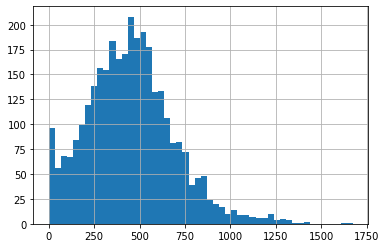

Гистограмма - интернет трафик:


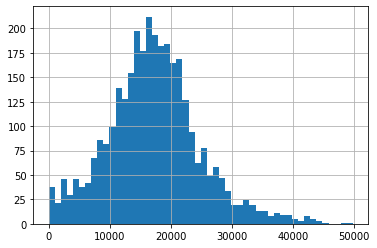

Гистограмма - количество сообщений:


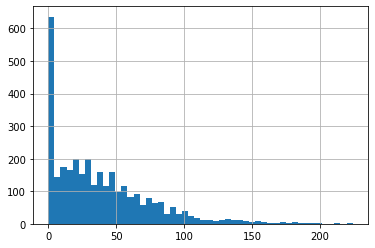

In [54]:
# Построим гистограммы по данным 'minutes_sum', 'mb_used_sum', 'messages_cnt' таблицы df_final

print('Гистограмма - минуты разговора:')
df_final['minutes_sum'].hist(bins=50);
plt.show()

print('Гистограмма - интернет трафик:')
('Гистограмма - интернет трафик')
df_final['mb_used_sum'].hist(bins=50);
plt.show()

print('Гистограмма - количество сообщений:')
df_final['messages_cnt'].hist(bins=50);
plt.show()

Диаграмма размаха - минуты разговора:


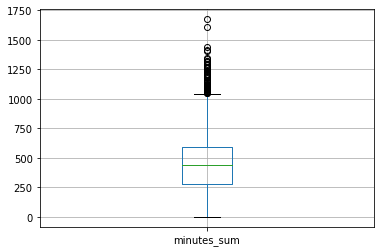

Диаграмма размаха  - интернет трафик:


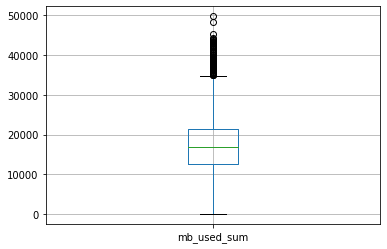

Диаграмма размаха  - количество сообщений:


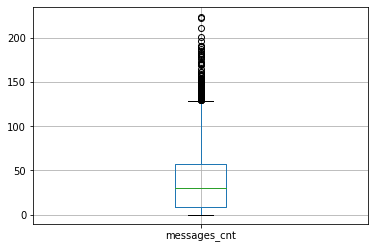

In [55]:
# Построим диаграммы размаха по данным 'minutes_sum', 'mb_used_sum', 'messages_cnt' таблицы df_final

print('Диаграмма размаха - минуты разговора:')
df_final.boxplot(column='minutes_sum');
plt.show()

print('Диаграмма размаха  - интернет трафик:')
df_final.boxplot(column='mb_used_sum');
plt.show()

print('Диаграмма размаха  - количество сообщений:')
df_final.boxplot(column='messages_cnt');
plt.show()

In [56]:
# расчитаем среднее и медиану набора данных
(round(df_final[['minutes_sum', 'mb_used_sum', 'messages_cnt']].agg(['mean', 'median'])))

,minutes_sum,mb_used_sum,messages_cnt
mean,451.0,17228.0,38.0
median,443.0,16966.0,30.0


Гистограмма - минуты разговора:


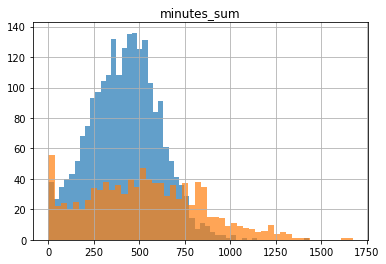

Гистограмма - интернет трафик:


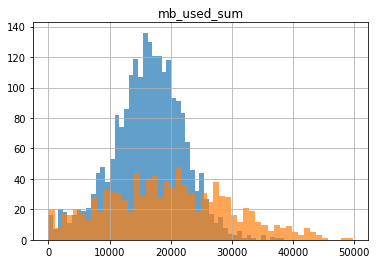

Гистограмма - количество сообщений:


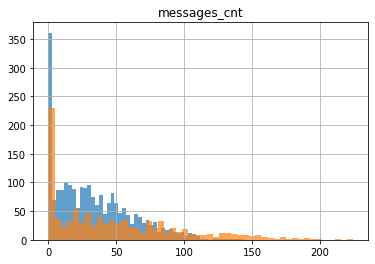

Примечание: синий - тариф smart, оранжевый - тариф ultra


In [57]:
# Построим гистограммы по данным 'minutes_sum', 'mb_used_sum', 'messages_cnt' таблицы df_final для 2х тарифов

print('Гистограмма - минуты разговора:')
ax = df_smart.hist('minutes_sum', alpha = 0.7, bins = 50)
df_ultra.hist('minutes_sum', alpha = 0.7, bins = 50, ax = ax)
plt.show()


print('Гистограмма - интернет трафик:')
ax = df_smart.hist('mb_used_sum', alpha = 0.7,bins = 50 )
df_ultra.hist('mb_used_sum', alpha = 0.7, bins = 50, ax = ax)
plt.show()

print('Гистограмма - количество сообщений:')
ax = df_smart.hist('messages_cnt', alpha = 0.7, bins = 50)
df_ultra.hist('messages_cnt', alpha = 0.7, bins = 50, ax = ax)
plt.show()

print('Примечание: синий - тариф smart, оранжевый - тариф ultra')

Диаграмма размаха для тарифа smart - минуты разговора:


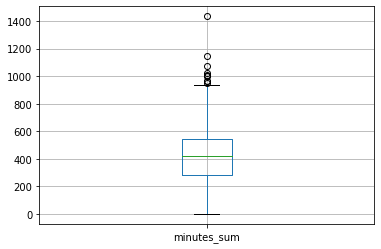

Диаграмма размаха для тарифа smart - интернет трафик:


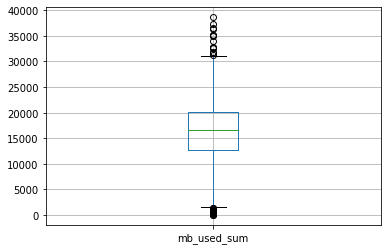

Диаграмма размаха для тарифа smart - количество сообщений:


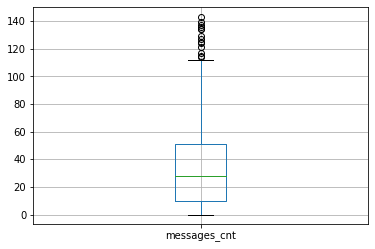

In [58]:
# Построим диаграммы размаха для тарифа smart

print('Диаграмма размаха для тарифа smart - минуты разговора:')
df_smart.boxplot(column='minutes_sum');
plt.show()

print('Диаграмма размаха для тарифа smart - интернет трафик:')
df_smart.boxplot(column='mb_used_sum');
plt.show()

print('Диаграмма размаха для тарифа smart - количество сообщений:')
df_smart.boxplot(column='messages_cnt');
plt.show()

In [59]:
# расчитаем среднее и медиану набора данных тарифа smart
(round(df_smart[['minutes_sum', 'mb_used_sum', 'messages_cnt']].agg(['mean', 'median'])))

,minutes_sum,mb_used_sum,messages_cnt
mean,418.0,16229.0,33.0
median,422.0,16531.0,28.0


Диаграмма размаха для тарифа ultra - минуты разговора


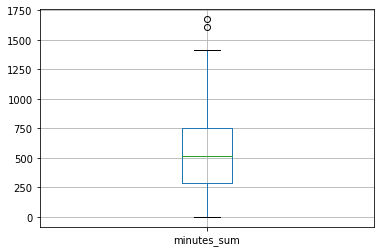

Диаграмма размаха для тарифа ultra - интернет трафик


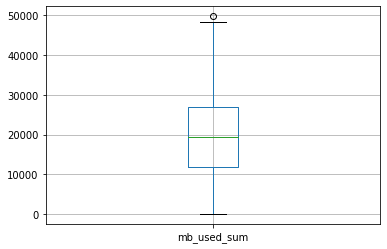

Диаграмма размаха для тарифа ultra - количество сообщений


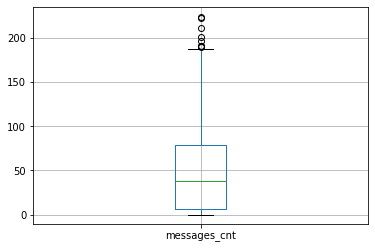

In [60]:
# Построим диаграммы размаха для тарифа ultra
print('Диаграмма размаха для тарифа ultra - минуты разговора')
df_ultra.boxplot(column='minutes_sum');
plt.show()

print('Диаграмма размаха для тарифа ultra - интернет трафик')
df_ultra.boxplot(column='mb_used_sum');
plt.show()

print('Диаграмма размаха для тарифа ultra - количество сообщений')
df_ultra.boxplot(column='messages_cnt');
plt.show()

In [61]:
# расчитаем среднее и медиану набора данных с тарифом ultra
(round(df_ultra[['minutes_sum', 'mb_used_sum', 'messages_cnt']].agg(['mean', 'median'])))

,minutes_sum,mb_used_sum,messages_cnt
mean,527.0,19487.0,49.0
median,518.0,19324.0,38.0


Гистограмма - выручки:


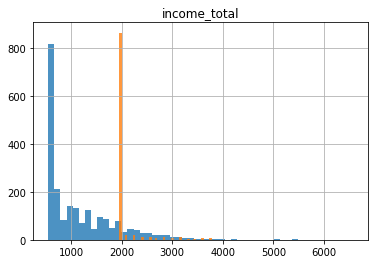

Диаграмма размаха выручки для тарифа ultra


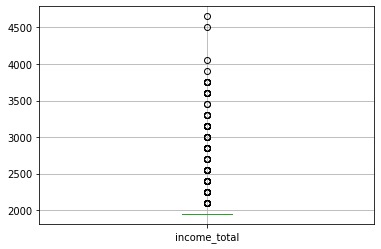

Диаграмма размаха выручки для тарифа smart


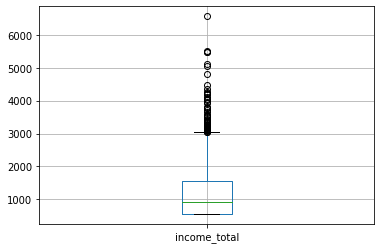

In [62]:
# Такжде построим гистограммы, диаграммы размаха для выручки по тарифам

print('Гистограмма - выручки:')
ax = df_smart.hist('income_total', alpha = 0.8, bins = 50)
df_ultra.hist('income_total', alpha = 0.8, bins = 50, ax = ax)
plt.show()

print('Диаграмма размаха выручки для тарифа ultra')
df_ultra.boxplot(column='income_total');
plt.show()

print('Диаграмма размаха выручки для тарифа smart')
df_smart.boxplot(column='income_total');
plt.show()

In [63]:
# расчитаем среднее и медиану выручки 'income_total' для двух тарифов

df_tariff_mean = (round(df_final.groupby('tariff')[['income_total']].agg(['mean', 'median'])))
df_tariff_mean

income_total       
               mean median
tariff                    
smart        1177.0    919
ultra        2051.0   1950

### Вывод:

1) Определили сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

2) Определили среднее количество, дисперсию и стандартное отклонение.

3) Посторили гистограммы, диаграммы размаха и определили характеристики положения (медиана и среднее). Сильная скошенность данных характерна для данных о количестве сообщений. Данные по интернету и количестве минут звонков близки к нормальному распределению.

Для пользователей тарифа "Смарт" кол-во израсходованного интернет трафика и кол-ва потраченных минут наиболее часто выходит за рамки тарифного плана. Кол-во смс в основном попадает в рамки тарифного плана.

Для польхователей тарифа "Ультра" кол-во израсходованного интернет трафика, кол-ва потраченных минут и кол-во смс имеет более широкий разброс. Кроме того кол-ко минут разговора и кол-во смс меньше, чем включает тариф. Можно предположить, что для пользователей тарифа "Ультра" наиболее важен объем интернет трафика.

Гистограммы выручки по тарифам показали, что пользователи тарифа  "Смарт" чаще платят сверх тарифа за доп. услуги.

### Шаг 4. Проверьте гипотезы

#### 4.1. Сформулируем и проверим первую гипотезу:

"Средняя выручка пользователе тарифов "Ультра" и "Смарт" равны."

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind.

In [64]:
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

tariff_ultra = df_ultra['income_total']
tariff_smart = df_smart['income_total']
    
results_tariff = st.ttest_ind(tariff_smart, tariff_ultra, equal_var = True)

results_tariff_pva = results_tariff.pvalue

print('p-значение: ', results_tariff_pva)
   
if results_tariff_pva < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.304764020044488e-223
Отвергаем нулевую гипотезу


#### 4.2. Сформулируем и проверим вторую гипотезу:

"Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов".

Также используем метод scipy.stats.ttest_ind.

In [65]:
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу


other_cities = df_full[df_full['city'] != "Москва"]['income_total']
moscow = df_full[df_full['city'] == "Москва"]['income_total']
    
results_city = st.ttest_ind(moscow, other_cities, equal_var = True)
    
results_city_pva = results_city.pvalue

print('p-значение: ', results_city_pva)
   
if results_city_pva < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.3729729010391226
Не получилось отвергнуть нулевую гипотезу


### Выводы:

1) Результат первой гипотезы: "Нулевая гипотеза отвергнута". Между средней выручкой от пользователей тарифов «Ультра» и «Смарт» имеются значимые различия. Вероятна связь между тарифом и выручкой. Исходя их среднего значения выручки по тарифам, можно пердположить, что средняя выручка тарифа «Ультра» больше средней выручки тарифа «Смарт».

2) Результат второй гипотезы: "Не получилось отвергнуть нулевую гипотезу". Полученное значение p-value говорит о том, что хотя средняя выручка в Москве и других городах и неодинакова, с вероятностью в почти 37% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой от пользователей из Москвы и других городов. Вероятно нет значимых различий между средней выручкой от пользователей из Москвы и других городов.

### Шаг 5. Общие выводы

Проведен анализ пользователей тарифов «Ультра» и «Смарт».

**Анализ показал** 

Для пользователей тарифа "Смарт" кол-во израсходованного интернет трафика и кол-ва потраченных минут наиболее часто выходят за рамки тарифного плана. Кол-во смс в основном попадает в рамки тарифного плана.

Для пользователей тарифа "Ультра" кол-во израсходованного интернет трафика, кол-ва потраченных минут и кол-во смс имеет более широкий разброс. Кроме того кол-ко минут разговора и кол-во смс меньше, чем включает тариф. Можно предположить, что для пользователей тарифа "Ультра" наиболее важен объем интернет трафика.

Гистограммы выручки по тарифам показали, что пользователи тарифа  "Смарт" чаще платят сверх тарифа за доп. услуги.

**Проверка гипотез показала:**

1) Между средней выручкой от пользователей тарифов «Ультра» и «Смарт» имеются значимые различия. Вероятна связь между тарифом и выручкой. Исходя их среднего значения выручки по тарифам, можно пердположить, что средняя выручка тарифа «Ультра» больше средней выручки тарифа «Смарт».

2) Отсутствуют значимые различия между средней выручкой от пользователей из Москвы и других городов.

**Рекомендации коммерческому департаменту:**

* Тариф "Смарт" рекламировать для широкой аудитории как универсальный тариф.
* Тариф "Ультра" рекламировать для целевой аудитории, для которой важен именно объем предоставляемого интернет трафика.